In [1]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [5]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\pauld\Anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       haa95532_0         121 KB
    cairo-1.16.0               |       h1c23506_3         1.9 MB
    certifi-2022.12.7          |   py37haa95532_0         149 KB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fontconfig-2.14.1          |       hc0defaf_1         198 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_2         1.8 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3    


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==custom=py37_1
  - defaults/win-64::google-api-core==2.10.1=py37haa95532_0
  - defaults/win-64::google-cloud-core==2.3.2=py37haa95532_0
  - defaults/win-64::google-cloud-storage==2.6.0=py37haa95532_0
  - defaults/win-64::googleapis-common-protos==1.56.4=py37haa95532_0
  - defaults/win-64::tensorboard==2.9.0=py37haa95532_0
  - defaults/win-64::tensorflow==2.9.1=mkl_py37h6343fec_1
  - defaults/win-64::tensorflow-base==2.9.1=mkl_py37h6a7f48e_1
  - defaults/win-64::_anaconda_depends==2022.05=py37_0


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [2]:
import tensorflow as tf

import random

from keras import Model

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, AveragePooling2D

from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

import numpy as np

import os

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from ann_visualizer.visualize import ann_viz

In [51]:
character_1best_files = []
token_1best_files = []
character_2mid_files = []
token_2mid_files = []
character_3mid_files = []
token_3mid_files = []
character_4worst_files = []
token_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_1best"

character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_2mid"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_3mid"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\PycharmProjects\DeepCRMFYP\RankedMethods\results_4worst"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))
        
        
        
        


In [52]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[int(num) for num in line.split(',') if num != "\n"][:754] for line in f ]
        matrixList.append(np.array(matrix))

In [53]:
random.seed(100)
character_1best_files = random.sample(character_1best_files, k = 950)
random.seed(100)
token_1best_files = random.sample(token_1best_files, k= 950)
#random.seed(100)
#character_2mid_files = random.sample(character_2mid_files, k = 1500)
#random.seed(100)
#token_2mid_files = random.sample(token_2mid_files, k= 1500)
#random.seed(100)
#character_3mid_files = random.sample(character_3mid_files, k = 1500)
#random.seed(100)
#token_3mid_files = random.sample(token_3mid_files, k= 1500)
random.seed(100)
character_4worst_files = random.sample(character_4worst_files, k = 950)
random.seed(100)
token_4worst_files = random.sample(token_4worst_files, k= 950)

In [54]:
#Adding Scalabrino
character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))



In [55]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []


matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)

print("done")

#matrixFileToMatrix(character_2mid_files, mid2_input_chars)
#matrixFileToMatrix(token_2mid_files, mid2_input_tokens)

print("done")

#matrixFileToMatrix(character_3mid_files, mid3_input_chars)
#matrixFileToMatrix(token_3mid_files, mid3_input_tokens)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)

done
done
done


In [56]:
input4_characters_x = []
input4_characters_y = []

input4_tokens_x = []
input4_tokens_y = []

for x in best1_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([0,1])

#for x in mid2_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,0,1,0])
    
#for x in mid3_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    input4_characters_x.append(x)
    input4_characters_y.append([1,0])



for x in best1_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([0, 1])

#for x in mid2_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,0,1,0])

#for x in mid3_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    input4_tokens_x.append(x)
    input4_tokens_y.append([1,0])

In [57]:
input4_characters_x = np.array(input4_characters_x)
input4_characters_y = np.array(input4_characters_y)

input4_tokens_x = np.array(input4_tokens_x)
input4_tokens_y = np.array(input4_tokens_y)

In [58]:
print(input4_characters_x.shape)
print(input4_characters_y.shape)

print(input4_tokens_x.shape)
print(input4_tokens_y.shape)

(2011, 50, 754)
(2011, 2)
(2011, 50, 754)
(2011, 2)


In [35]:
input4_characters_x, input4_characters_y = shuffle(input4_characters_x, input4_characters_y, random_state=0)

input4_tokens_x, input4_tokens_y = shuffle(input4_tokens_x, input4_tokens_y, random_state=0)

In [59]:
#Normalising
#input4_characters_x = input4_characters_x + 1

In [61]:
#input4_characters_x = input4_characters_x/127

In [62]:
#input4_characters_x.max()

1.0

In [63]:
x_characters_train4, x_characters_test4, y_characters_train4, y_characters_test4 = train_test_split(
    input4_characters_x, input4_characters_y, test_size = 0.2, random_state=24)

#x_characters_train4, x_characters_valid4, y_characters_train4, y_characters_valid4 = train_test_split(
 #   x_characters_train4, y_characters_train4, test_size = 0.125, random_state=24)

x_tokens_train4, x_tokens_test4, y_tokens_train4, y_tokens_test4 = train_test_split(
    input4_tokens_x, input4_tokens_y, test_size = 0.2, random_state=24)

# Single Input
## Character Level

In [3]:
batch_size = 64
epochs = 2

model4 = Sequential()
model4.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50,754,1)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D(pool_size= (2,2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(2, activation='softmax'))

print(model4.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 752, 32)       320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 750, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 375, 64)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 375, 64)       0         
                                                                 
 flatten (Flatten)           (None, 552000)            0         
                                                                 
 dense (Dense)               (None, 64)                35328064  
                                                        

In [9]:
ann_viz(model4, view=True, filename = "methodCharacterCNN", title="CNN for Character Representation of Methods")

In [75]:
plot(model4)

NameError: name 'plot' is not defined

In [73]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

character_fit = model4.fit(x_characters_train4, y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test4, y_characters_test4))
character_score = model4.evaluate(x_characters_test4, y_characters_test4, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/2
26/26 [==============================] - 124s 5s/step - loss: 0.4970 - accuracy: 0.8085 - val_loss: 0.3963 - val_accuracy: 0.8164
Epoch 2/2
26/26 [==============================] - 114s 4s/step - loss: 0.3510 - accuracy: 0.8682 - val_loss: 0.3021 - val_accuracy: 0.8958
Test loss: 0.3021220564842224
Test accuracy: 0.8957816362380981


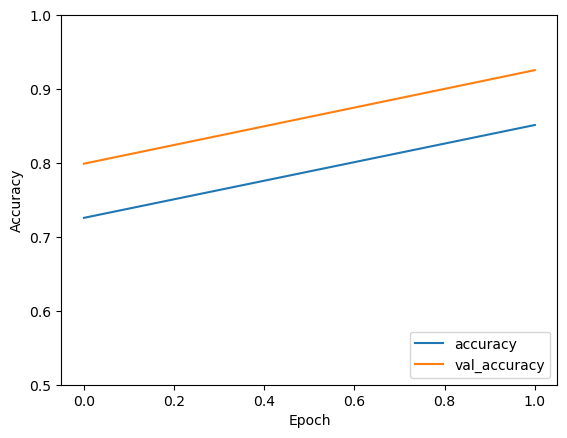

In [39]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

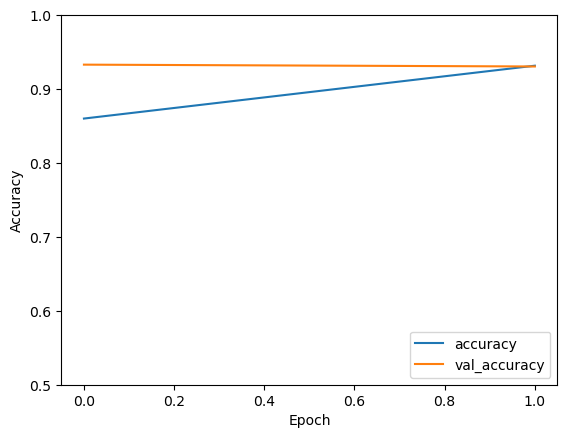

In [66]:
plt.plot(character_fit.history['accuracy'], label='accuracy')
plt.plot(character_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Scalabrino Test

In [40]:
character_1best_files = []
token_1best_files = []
character_2mid_files = []
token_2mid_files = []
character_3mid_files = []
token_3mid_files = []
character_4worst_files = []
token_4worst_files = []

character_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
token_1best_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\4"
character_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"
token_2mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\3"

character_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"
token_3mid_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\2"

character_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Character\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"
token_4worst_file_path = r"C:\Users\pauld\PycharmProjects\DeepCRMFYP\Source Code\Token\Users\pauld\OneDrive\Documents\DSA\FYP\ScalabrinoDataset\Ranked_Snippets\1"

for parent, dirnames, filenames in os.walk(character_1best_file_path):
    for filename in filenames:
        character_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_1best_file_path):
    for filename in filenames:
        token_1best_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_2mid_file_path):
    for filename in filenames:
        character_2mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_2mid_file_path):
    for filename in filenames:
        token_2mid_files.append(os.path.join(parent, filename))

for parent, dirnames, filenames in os.walk(character_3mid_file_path):
    for filename in filenames:
        character_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_3mid_file_path):
    for filename in filenames:
        token_3mid_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(character_4worst_file_path):
    for filename in filenames:
        character_4worst_files.append(os.path.join(parent, filename))
        
for parent, dirnames, filenames in os.walk(token_4worst_file_path):
    for filename in filenames:
        token_4worst_files.append(os.path.join(parent, filename))



In [41]:
def matrixFileToMatrix(files, matrixList):
    for file in files:
        matrix = []
        with open(file, 'r') as f:
            matrix = [[int(num) for num in line.split(',') if num != "\n"] for line in f ]
        matrixList.append(np.array(matrix))

In [42]:
best1_input_chars = []
mid2_input_chars = []
mid3_input_chars = []
worst4_input_chars = []
best1_input_tokens = []
mid2_input_tokens = []
mid3_input_tokens = []
worst4_input_tokens = []


matrixFileToMatrix(character_1best_files, best1_input_chars)
matrixFileToMatrix(token_1best_files, best1_input_tokens)

print("done")

#matrixFileToMatrix(character_2mid_files, mid2_input_chars)
#matrixFileToMatrix(token_2mid_files, mid2_input_tokens)

print("done")

#matrixFileToMatrix(character_3mid_files, mid3_input_chars)
#matrixFileToMatrix(token_3mid_files, mid3_input_tokens)

print("done")

matrixFileToMatrix(character_4worst_files, worst4_input_chars)
matrixFileToMatrix(token_4worst_files, worst4_input_tokens)

done
done
done


In [43]:
scala_input4_characters_x = []
scala_input4_characters_y = []

scala_input4_tokens_x = []
scala_input4_tokens_y = []

for x in best1_input_chars:
    scala_input4_characters_x.append(x)
    scala_input4_characters_y.append([0,1])

#for x in mid2_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,0,1,0])
    
#for x in mid3_input_chars:
 #   input4_characters_x.append(x)
  #  input4_characters_y.append([0,1,0,0])

for x in worst4_input_chars:
    scala_input4_characters_x.append(x)
    scala_input4_characters_y.append([1,0])



for x in best1_input_tokens:
    scala_input4_tokens_x.append(x)
    scala_input4_tokens_y.append([0, 1])

#for x in mid2_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,0,1,0])

#for x in mid3_input_tokens:
 #   input4_tokens_x.append(x)
  #  input4_tokens_y.append([0,1,0,0])

for x in worst4_input_tokens:
    scala_input4_tokens_x.append(x)
    scala_input4_tokens_y.append([1,0])

In [44]:
scala_input4_characters_x = np.array(scala_input4_characters_x)
scala_input4_characters_y = np.array(scala_input4_characters_y)

scala_input4_tokens_x = np.array(scala_input4_tokens_x)
scala_input4_tokens_y = np.array(scala_input4_tokens_y)

In [45]:
print(scala_input4_characters_x.shape)
print(scala_input4_characters_y.shape)

print(scala_input4_tokens_x.shape)
print(scala_input4_tokens_y.shape)

(111, 50, 754)
(111, 2)
(111, 50, 754)
(111, 2)


In [46]:
character_score = model4.evaluate(scala_input4_characters_x, scala_input4_characters_y, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Test loss: 1.6039706468582153
Test accuracy: 0.5405405163764954


In [47]:
x_characters_train4, x_characters_test4, y_characters_train4, y_characters_test4 = train_test_split(
    scala_input4_characters_x, scala_input4_characters_y, test_size = 0.2, random_state=24)

In [48]:
model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

scala_character_fit = model4.fit(x_characters_train4, y_characters_train4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_characters_test4, y_characters_test4))
character_score = model4.evaluate(x_characters_test4, y_characters_test4, verbose=0)
print('Test loss:', character_score[0])
print('Test accuracy:', character_score[1])

Epoch 1/2
2/2 [==============================] - 10s 3s/step - loss: 1.8224 - accuracy: 0.4773 - val_loss: 0.7871 - val_accuracy: 0.3913
Epoch 2/2
2/2 [==============================] - 8s 2s/step - loss: 0.7826 - accuracy: 0.4545 - val_loss: 0.7836 - val_accuracy: 0.3478
Test loss: 0.7836108207702637
Test accuracy: 0.3478260934352875
